# Tesla Stock Prediction Model :-

**1- loading the data and explore it**

**2- cleaning the dataset**

**3- visualising the data**

**4- Models implimntation**

**5- Models Evaluation**

# loading the data and explore it :-

In [263]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
df = pd.read_csv('DATA/TSLA.csv')

# looking at the first 5 rows of the dataset
print(df.head())

# information about the dataset
print('\n info :' , df.info())

# statistics of the dataset
print('\n describtion :' , df.describe())



         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB

 info : None

 describtion :               Open         High          Low        Close    A

# cleaning the dataset :- 

In [264]:
# transforming the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# setting the date column as index
df.set_index('Date', inplace=True)

# checking for the data types
print('\n data types :' , df.dtypes)

# checking for the shape of the dataset
print('\n shape :' , df.shape)


# checking for null values
print('\n null values :' , df.isnull().sum())

# checking for duplicates
print('\n duplicates :' , df.duplicated().sum())


 data types : Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

 shape : (2956, 6)

 null values : Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 duplicates : 0


**now there is no problem with the data**

# visualising the data :-

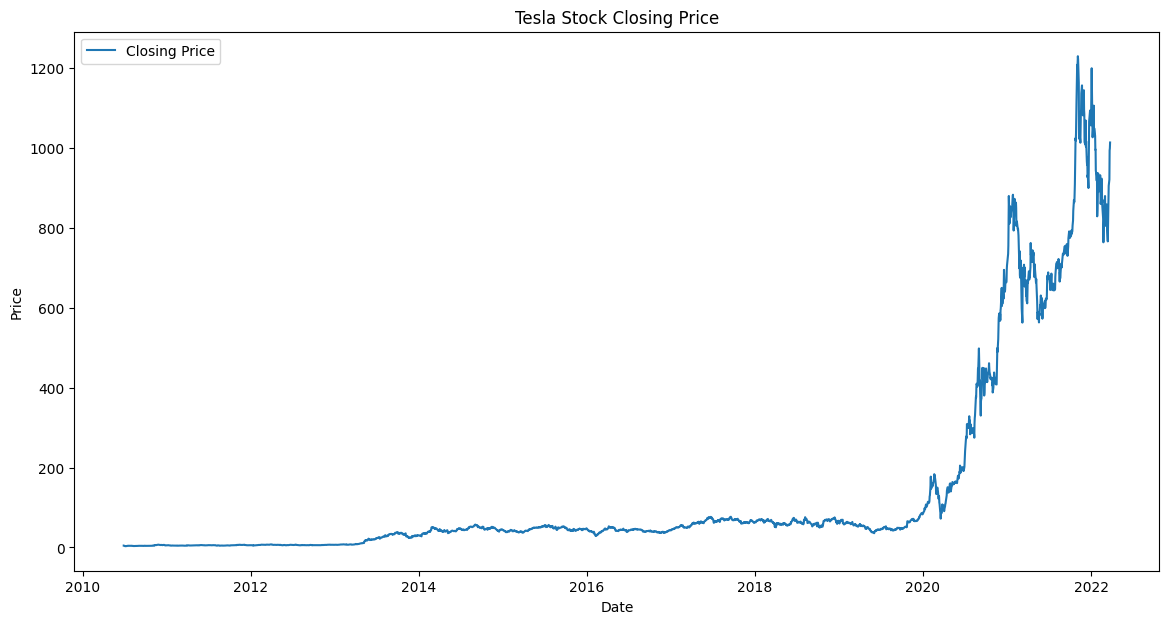

In [265]:
# visualising the closing price
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Tesla Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

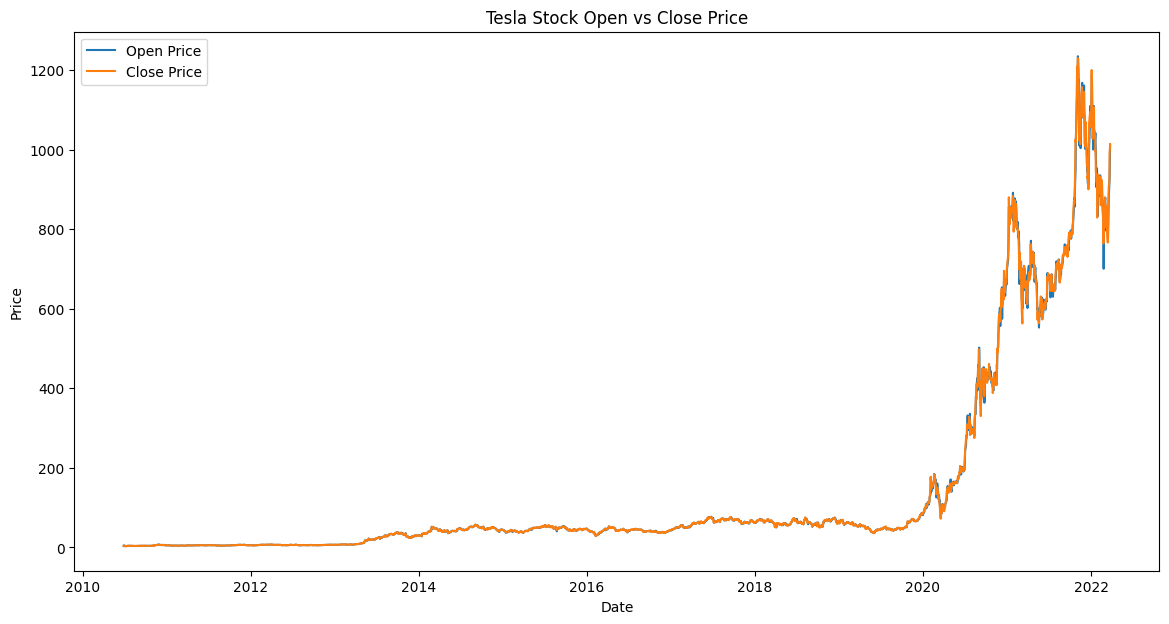

In [266]:
# open vs close price
plt.figure(figsize=(14,7))
plt.plot(df['Open'], label='Open Price')
plt.plot(df['Close'], label='Close Price')
plt.title('Tesla Stock Open vs Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

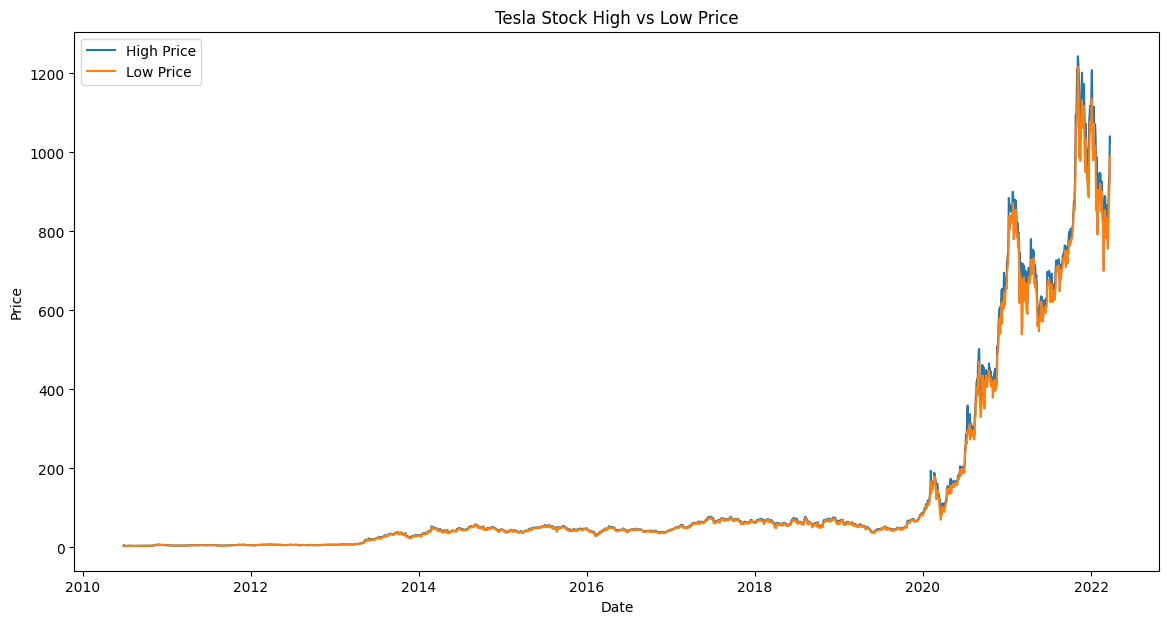

In [267]:
# higest and lowest price
plt.figure(figsize=(14,7))
plt.plot(df['High'], label='High Price')
plt.plot(df['Low'], label='Low Price')
plt.title('Tesla Stock High vs Low Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

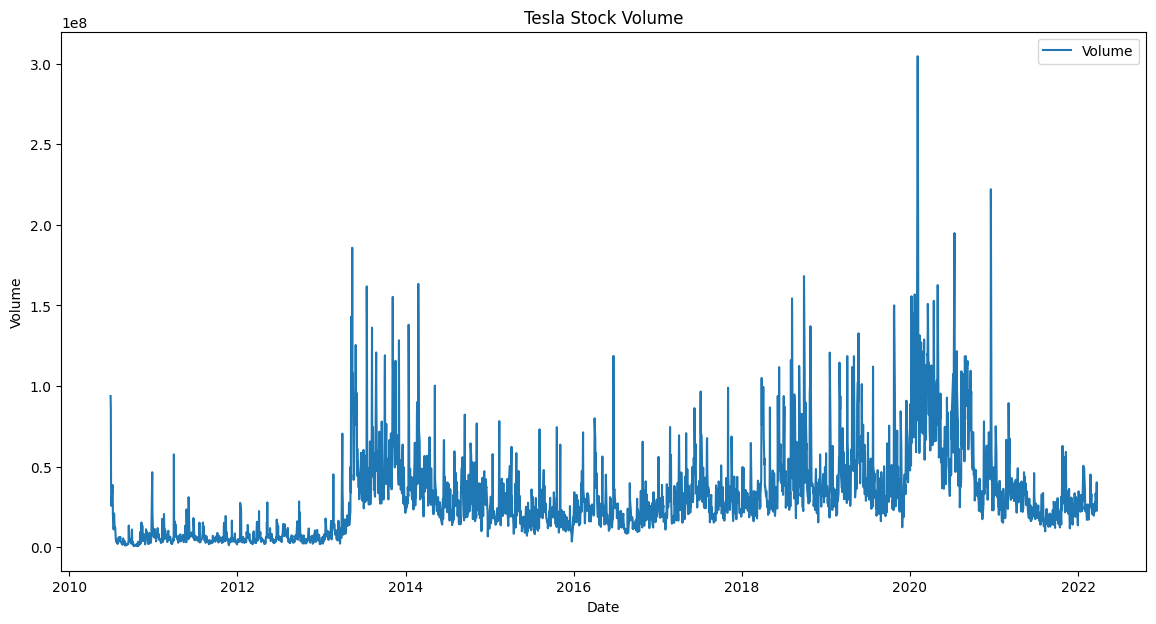

In [268]:
# the volume of the stock
plt.figure(figsize=(14,7))
plt.plot(df['Volume'], label='Volume')
plt.title('Tesla Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# copeing the df for each model 

In [269]:
# rf model copy
df_rf = df.copy()

# arima model copy
df_arima = df.copy()

# prophet model copy
df_prophet = df.copy().reset_index()





# Models implimntation :-

## Random Forest Model :- 

In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error, r2_score

# feature engineering
df_rf['lag_1'] = df_rf['Close'].shift(1)
df_rf['lag_2'] = df_rf['Close'].shift(2)
df_rf['MA_7'] = df_rf['Close'].rolling(window=7).mean()
df_rf['STD_7'] = df_rf['Close'].rolling(window=7).std()

# dropping null values
df_rf.dropna(inplace=True)


# scaling the features
features = ['lag_1', 'lag_2', 'MA_7' , 'STD_7']
scaler = MinMaxScaler()
df_rf[features] = scaler.fit_transform(df_rf[features])

# train-test split last 60 days
train_size = df_rf.iloc[:-60]
test_size = df_rf.iloc[-60:]

# defining the features and target variable
X_train = train_size[features]
y_train = train_size['Close']
X_test = test_size[features]
y_test = test_size['Close']

# initializing the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fitting the model
rf_model.fit(X_train, y_train)

# making predictions
rf_predictions = rf_model.predict(X_test)

# evaluating the model
rf_rmse = root_mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)





## ARIMA Model :-

In [271]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score , root_mean_squared_error



# train and test split
train_size = df_arima.iloc[:-60]
test_size = df_arima.iloc[-60:]

# checking for stationarity
result = adfuller(train_size['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# p-value > 0.05 indicates non-stationarity, so we need to difference the data
train_size['Close_diff'] = train_size['Close'].diff()
print('ADF Statistic after differencing:', adfuller(train_size['Close_diff'].dropna())[0])
print('p-value after differencing:', adfuller(train_size['Close_diff'].dropna())[1])



ADF Statistic: 2.79803302038231
p-value: 1.0
ADF Statistic after differencing: -10.106235270870808


C:\Users\WAFACo\AppData\Local\Temp\ipykernel_6432\2997209582.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_size['Close_diff'] = train_size['Close'].diff()


p-value after differencing: 1.0281831973787391e-17


**so now we know d=1**

<Figure size 1200x600 with 0 Axes>

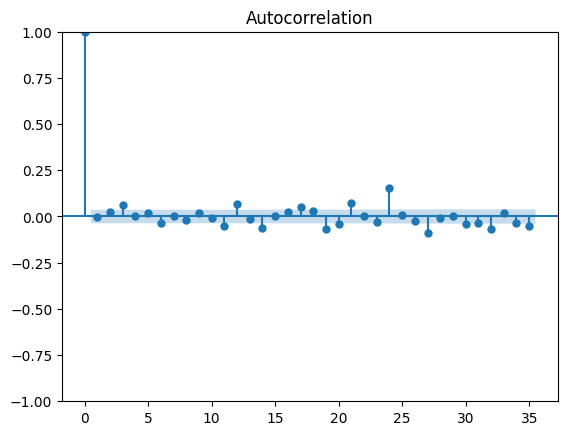

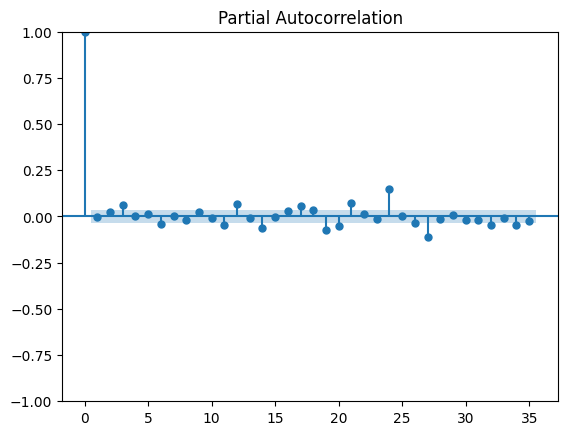

In [272]:
# gitting the order of the ARIMA model
plt.figure(figsize=(12, 6))
plot_acf(train_size['Close_diff'].dropna())
plot_pacf(train_size['Close_diff'].dropna())
plt.show()

**we see that p=1 and q=1**

In [273]:
# fitting the ARIMA model
p = 1  # from PACF plot
d = 1  # from differencing
q = 1  # from ACF plot
arima_model = ARIMA(train_size['Close'], order=(p, d, q))
arima_model_fit = arima_model.fit()

# making predictions
arima_predictions = arima_model_fit.forecast(steps=60)

# evaluating the ARIMA model
arima_rmse = root_mean_squared_error(test_size['Close'], arima_predictions )
arima_r2 = r2_score(test_size['Close'], arima_predictions)



e:\yamen apps\phyton\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\yamen apps\phyton\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\yamen apps\phyton\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\yamen apps\phyton\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\yam

## Prophet :- 

In [274]:
from prophet import Prophet
from sklearn.metrics import root_mean_squared_error, r2_score

# preparing the data for Prophet
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# train-test split
train_df = df_prophet.iloc[:-60]
test_df = df_prophet.iloc[-60:]

# fitting the Prophet model
prophet_model = Prophet()
prophet_model.fit(train_df)

# making predictions
future = prophet_model.make_future_dataframe(periods=60)
forecast = prophet_model.predict(future)
prophet_predictions = forecast['yhat'][-60:].values

# evaluating the Prophet model
prophet_rmse = root_mean_squared_error(test_df['y'], prophet_predictions)
prophet_r2 = r2_score(test_df['y'], prophet_predictions)


16:04:16 - cmdstanpy - INFO - Chain [1] start processing
16:04:17 - cmdstanpy - INFO - Chain [1] done processing


# Models Evaluation :-

Random Forest RMSE: 46.80918598979084, R2: 0.783401666415609
ARIMA RMSE: 188.09417603243412, R2: -2.497386511398815
Prophet RMSE: 148.12439675594223, R2: -1.168932930995597


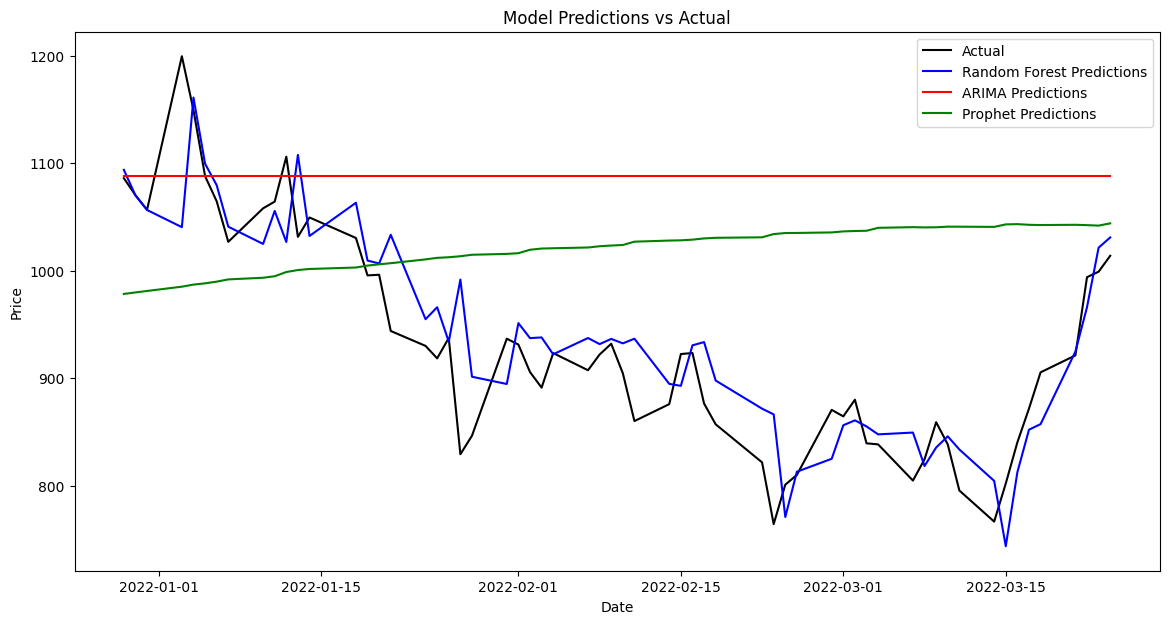

In [275]:
#printing the evaluation metrics
print(f'Random Forest RMSE: {rf_rmse}, R2: {rf_r2}')
print(f'ARIMA RMSE: {arima_rmse}, R2: {arima_r2}')
print(f'Prophet RMSE: {prophet_rmse}, R2: {prophet_r2}')

# plotting the predictions
plt.figure(figsize=(14, 7))
plt.plot(test_size.index, y_test, label='Actual', color='black')
plt.plot(test_size.index, rf_predictions, label='Random Forest Predictions', color='blue')
plt.plot(test_size.index, arima_predictions, label='ARIMA Predictions', color='red')
plt.plot(test_df['ds'], prophet_predictions, label='Prophet Predictions', color='green')
plt.title('Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()